[thank you internet](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/?utm_source=mybridge&utm_medium=email&utm_campaign=read_more)

In [1]:
import sys
import datetime

import pandas as pd
#import pandas.io.data as web   # deprecated pandas 0.19
#from pandas_datareader import data, wb
import pandas_datareader.data as web

import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

print ('python version: ', sys.version_info, '\n')

Populating the interactive namespace from numpy and matplotlib
python version:  sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0) 



In [2]:
neurofund = {
    'holdings':{
        'crypto':{
            'ETH':{},
            'BTC':{}
        },
        'market':{
            'SCTY':{},
            'ADBE':{},
            'AAPL':{},
            'FB':{},
            'GPRO':{},
            'HPQ':{},
            'INTC':{},
            'NVDA':{},
            'TWTR':{}
        }
    },
    'research':{},
    'indeces':{
        '^DJI':{},
        '^GSPC':{},
        'NDAQ':{}
    }
}



research_list = ['F','GE','GM','TSLA','TM','PG','LULU','NKE','UA',
        'ABT','AET','A','ANTM','BSX','CERN','CI','DXCM',
        'EW','HUM','ILMN','PODD','ISRG','JNJ','LIVN','MDT',
        'NVRO','PEN','SENS','STJ','SYK','TNDM','TMO','UTHR',
        'UNH','IUSG','MSF','.IXIC','.INX','VTI','AMZN','ADSK',
        'XONE','GOOGL','GOOG','INTU','INVN','IRBT','MSFT',
        'NFLX','QCOM','CRM','ZEN','VA']

for stock in research_list:
    neurofund['research'][stock] = {}

In [3]:
# set start / end timeframe
start = datetime.datetime(2015,1,1)
end = datetime.date.today()

In [4]:
# get stock data for market holdings
for stock in neurofund['holdings']['market']:
    neurofund['holdings']['market'][stock]=web.DataReader(stock, "yahoo", start, end).to_dict()

# get stock data for market holdings
for index in neurofund['indeces']:
    neurofund['indeces'][index]=web.DataReader(index, "yahoo", start, end).to_dict()

In [5]:
# get ['Adj Close'] for plotting
indeces_adjclose = {index: neurofund['indeces'][index]['Adj Close'] for index in neurofund['indeces']}
market_adjclose = {stock: neurofund['holdings']['market'][stock]['Adj Close'] for stock in neurofund['holdings']['market']}

In [6]:
stocks = pd.DataFrame(market_adjclose)
indeces = pd.DataFrame(indeces_adjclose)
#stocks = stocks.join(indeces, how='outer')

## _plot market stocks_

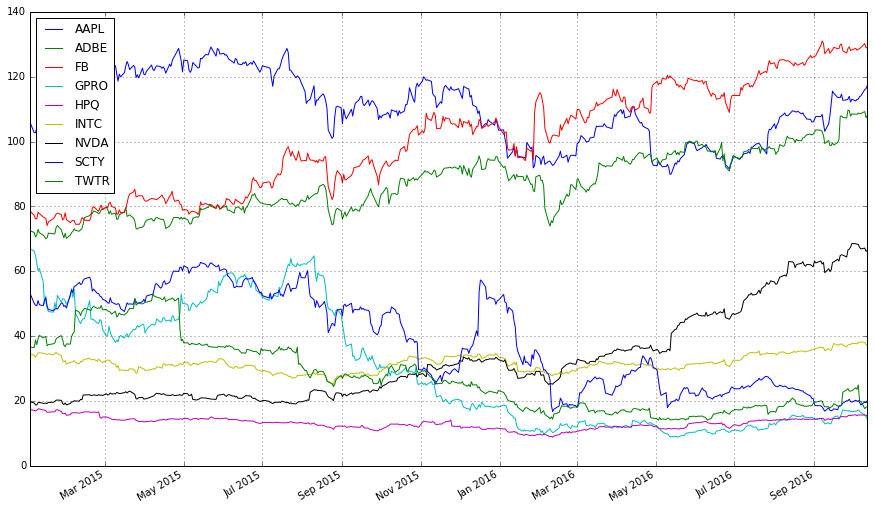

In [7]:
stocks.plot(grid= True)

## _plot indeces_

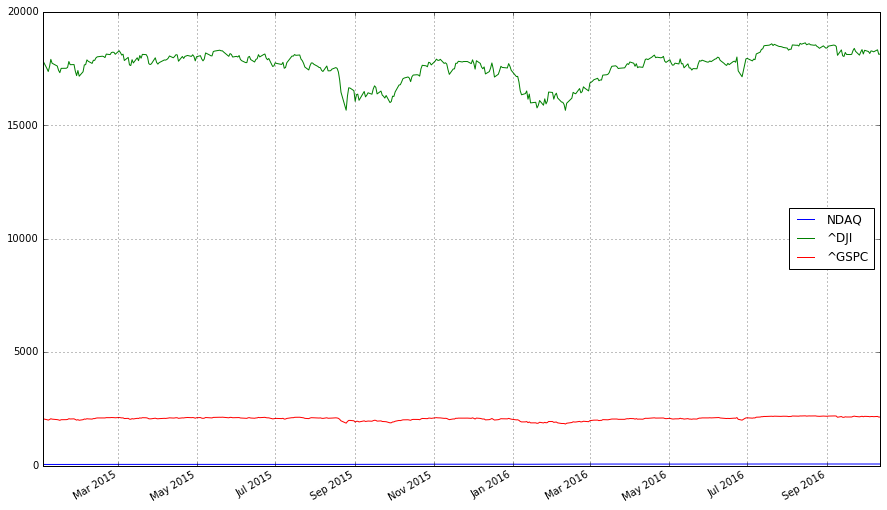

In [8]:
indeces.plot(grid= True)

## _plot relative gain for stocks_

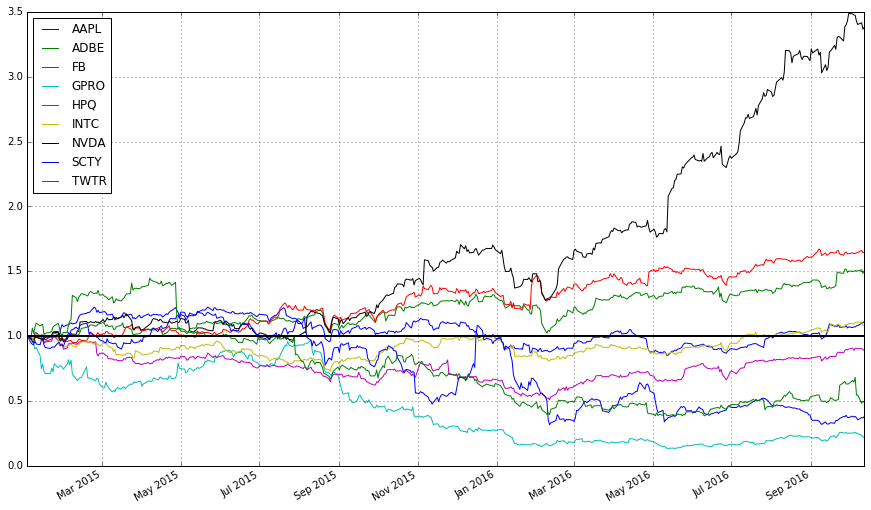

In [9]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

## _plot relative gain for indeces_

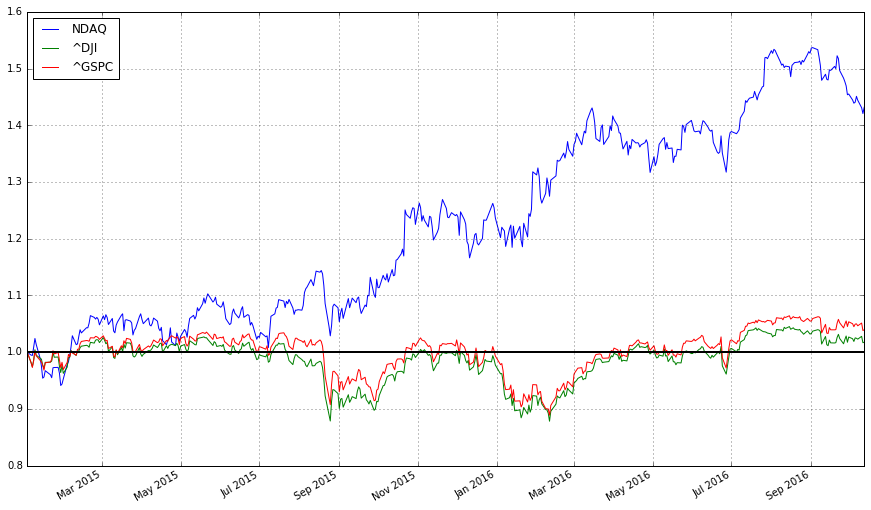

In [10]:
idx_return = indeces.apply(lambda x: x / x[0])

idx_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)